In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
X = np.array([
    [6, 6, 5, 5.5, 8],
    [8, 8, 8, 8, 9],
    [6, 7, 11, 9.5, 11],
    [14.5, 14.5, 15.5, 15, 8],
    [14, 14, 12, 12, 10],
    [11, 10, 5.5, 7, 13],
    [5.5, 7, 14, 11.5, 10],
    [13, 12.5, 8.5, 9.5, 12],
    [9, 9.5, 12.5, 12, 18]
])

In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

## A) Analysis of individual points (observations)


###1. Calculate the squared distance of each individual to the cloud center in factorial subspace and determine the quality of representation

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Given data
X = np.array([
    [6, 6, 5, 5.5, 8],
    [8, 8, 8, 8, 9],
    [6, 7, 11, 9.5, 11],
    [14.5, 14.5, 15.5, 15, 8],
    [14, 14, 12, 12, 10],
    [11, 10, 5.5, 7, 13],
    [5.5, 7, 14, 11.5, 10],
    [13, 12.5, 8.5, 9.5, 12],
    [9, 9.5, 12.5, 12, 18]
])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Squared distances to center in the full space
squared_distances_full = np.sum(X_scaled**2, axis=1)

# Squared distances to center in the factorial subspace (first 3 axes)
squared_distances_factorial = np.zeros((X.shape[0], 3))
for i in range(3):
    squared_distances_factorial[:, i] = X_pca[:, i]**2

# Cumulative squared distances in factorial subspace
cumulative_sq_dist = np.zeros((X.shape[0], 3))
for i in range(3):
    if i == 0:
        cumulative_sq_dist[:, i] = squared_distances_factorial[:, i]
    else:
        cumulative_sq_dist[:, i] = cumulative_sq_dist[:, i-1] + squared_distances_factorial[:, i]

# Quality of representation of each individual on each axis (cos²)
quality_representation = np.zeros((X.shape[0], 3))
for i in range(3):
    quality_representation[:, i] = squared_distances_factorial[:, i] / squared_distances_full

# Cumulative quality of representation
cumulative_quality = np.zeros((X.shape[0], 3))
for i in range(3):
    if i == 0:
        cumulative_quality[:, i] = quality_representation[:, i]
    else:
        cumulative_quality[:, i] = cumulative_quality[:, i-1] + quality_representation[:, i]

# Create a DataFrame to display the results
individual_names = [f"E{i+1}" for i in range(X.shape[0])]
quality_df = pd.DataFrame(quality_representation,
                          index=individual_names,
                          columns=["Axis 1", "Axis 2", "Axis 3"])

# Add cumulative quality columns
quality_df["Axis 1+2"] = cumulative_quality[:, 1]
quality_df["Axis 1+2+3"] = cumulative_quality[:, 2]

# Display the results
print("Quality of Representation (cos²) of each individual on each axis:")
print(quality_df.round(3))

# Create a categorical assessment of representation quality
def assess_quality(value):
    if value < 0.3:
        return "Poor"
    elif value < 0.5:
        return "Moderate"
    elif value < 0.7:
        return "Good"
    else:
        return "Excellent"

assessment_df = quality_df.copy()
for col in assessment_df.columns:
    assessment_df[col] = assessment_df[col].apply(assess_quality)

print("\nQuality Assessment:")
print(assessment_df)

Quality of Representation (cos²) of each individual on each axis:
    Axis 1  Axis 2  Axis 3  Axis 1+2  Axis 1+2+3
E1   0.885   0.052   0.062     0.938       1.000
E2   0.792   0.054   0.153     0.846       0.999
E3   0.478   0.481   0.038     0.960       0.998
E4   0.879   0.002   0.118     0.881       0.999
E5   0.852   0.138   0.008     0.990       0.998
E6   0.247   0.396   0.357     0.643       0.999
E7   0.026   0.767   0.206     0.793       0.999
E8   0.188   0.590   0.221     0.777       0.999
E9   0.058   0.346   0.595     0.404       0.999

Quality Assessment:
       Axis 1     Axis 2    Axis 3   Axis 1+2 Axis 1+2+3
E1  Excellent       Poor      Poor  Excellent  Excellent
E2  Excellent       Poor      Poor  Excellent  Excellent
E3   Moderate   Moderate      Poor  Excellent  Excellent
E4  Excellent       Poor      Poor  Excellent  Excellent
E5  Excellent       Poor      Poor  Excellent  Excellent
E6       Poor   Moderate  Moderate       Good  Excellent
E7       Poor  Excellent

### 2) Calculate the contribution of each individual to the inertia of each principal axis


In [5]:

# Calculate contribution of each individual to the inertia of each axis
contributions = np.zeros((X.shape[0], 3))
for i in range(3):
    # Squared coordinates of individuals on axis i
    squared_coords = X_pca[:, i]**2
    # Eigenvalue (inertia) of axis i
    eigenvalue = pca.explained_variance_[i]
    # Contribution of each individual to the inertia of axis i
    contributions[:, i] = squared_coords / (X.shape[0] * eigenvalue)

# Create a DataFrame to display the results
individual_names = [f"E{i+1}" for i in range(X.shape[0])]
contrib_df = pd.DataFrame(contributions * 100,
                         index=individual_names,
                         columns=["Axis 1 (%)", "Axis 2 (%)", "Axis 3 (%)"])

# Display the results
print("Contribution of each individual to the inertia of each principal axis (%):")
print(contrib_df.round(2))

# Calculate mean contribution threshold
mean_contrib = 100 / X.shape[0]
print(f"\nMean contribution threshold: {mean_contrib:.2f}%")

# Identify individuals with high contributions (above threshold)
def highlight_contributions(contrib_value):
    if contrib_value > mean_contrib:
        return "Significant"
    else:
        return "Not significant"

significant_df = contrib_df.copy()
for col in significant_df.columns:
    significant_df[col] = significant_df[col].apply(highlight_contributions)

print("\nSignificance of contributions:")
print(significant_df)

Contribution of each individual to the inertia of each principal axis (%):
    Axis 1 (%)  Axis 2 (%)  Axis 3 (%)
E1       26.78        3.93        5.45
E2        5.50        0.94        3.09
E3        3.57        8.93        0.83
E4       33.64        0.24       13.15
E5       13.19        5.33        0.36
E6        3.10       12.39       13.06
E7        0.36       26.43        8.31
E8        1.40       10.96        4.81
E9        1.34       19.76       39.82

Mean contribution threshold: 11.11%

Significance of contributions:
         Axis 1 (%)       Axis 2 (%)       Axis 3 (%)
E1      Significant  Not significant  Not significant
E2  Not significant  Not significant  Not significant
E3  Not significant  Not significant  Not significant
E4      Significant  Not significant      Significant
E5      Significant  Not significant  Not significant
E6  Not significant      Significant      Significant
E7  Not significant      Significant  Not significant
E8  Not significant  Not significa

### 3) Determine the poorly represented individuals on each axis with their sign


In [6]:
# Squared distances to center in the full space
squared_distances_full = np.sum(X_scaled**2, axis=1)

# Quality of representation of each individual on each axis (cos²)
quality_representation = np.zeros((X.shape[0], 3))
for i in range(3):
    quality_representation[:, i] = X_pca[:, i]**2 / squared_distances_full

# Create a DataFrame with the quality of representation
individual_names = [f"E{i+1}" for i in range(X.shape[0])]
quality_df = pd.DataFrame(quality_representation,
                          index=individual_names,
                          columns=["Axis 1", "Axis 2", "Axis 3"])

# Add the sign of the coordinates on each axis
sign_df = pd.DataFrame(np.sign(X_pca[:, :3]),
                      index=individual_names,
                      columns=["Axis 1 Sign", "Axis 2 Sign", "Axis 3 Sign"])

# Combine quality and sign
combined_df = pd.concat([quality_df, sign_df], axis=1)

# Set a threshold for poor representation (adjust as needed)
threshold = 0.3

# Identify poorly represented individuals
poorly_represented = {}
for i in range(3):
    axis_name = f"Axis {i+1}"
    sign_name = f"Axis {i+1} Sign"
    poor_indices = quality_df[axis_name] < threshold

    if poor_indices.any():
        poor_individuals = []
        for idx in poor_indices[poor_indices].index:
            sign = "+" if combined_df.loc[idx, sign_name] > 0 else "-"
            poor_individuals.append(f"{idx} ({sign})")

        poorly_represented[axis_name] = poor_individuals

# Display results
print("Quality of Representation (cos²) with Sign:")
print(combined_df)

print("\nPoorly Represented Individuals (cos² < 0.3) with Sign:")
for axis, individuals in poorly_represented.items():
    if individuals:
        print(f"{axis}: {', '.join(individuals)}")
    else:
        print(f"{axis}: None")

Quality of Representation (cos²) with Sign:
      Axis 1    Axis 2    Axis 3  Axis 1 Sign  Axis 2 Sign  Axis 3 Sign
E1  0.885453  0.052212  0.061943         -1.0         -1.0         -1.0
E2  0.792041  0.054226  0.153038         -1.0         -1.0         -1.0
E3  0.478429  0.481334  0.038410         -1.0          1.0         -1.0
E4  0.878599  0.002479  0.118016          1.0         -1.0         -1.0
E5  0.851522  0.138295  0.007975          1.0         -1.0         -1.0
E6  0.246536  0.396158  0.356766         -1.0         -1.0          1.0
E7  0.026309  0.767096  0.206083         -1.0          1.0         -1.0
E8  0.187663  0.589769  0.221141          1.0         -1.0          1.0
E9  0.058319  0.345793  0.595379          1.0          1.0          1.0

Poorly Represented Individuals (cos² < 0.3) with Sign:
Axis 1: E6 (-), E7 (-), E8 (+), E9 (+)
Axis 2: E1 (-), E2 (-), E4 (-), E5 (-)
Axis 3: E1 (-), E2 (-), E3 (-), E4 (-), E5 (-), E7 (-), E8 (+)


## B) Analysis of the variables


### 1) Determine the coordinates of variables on all principal axes


In [9]:

# Variable names
variable_names = ["Mul", "Maths", "Système", "Réseau", "Autre"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate variable coordinates (correlations between variables and principal components)
variable_coords = np.zeros((X.shape[1], 3))
for i in range(3):
    variable_coords[:, i] = pca.components_[i, :] * np.sqrt(pca.explained_variance_[i])

# Create a DataFrame to display the variable coordinates
var_coords_df = pd.DataFrame(variable_coords,
                            index=variable_names,
                            columns=["Axis 1", "Axis 2", "Axis 3"])

# Display the results
print("Coordinates of variables on principal axes (correlations):")
print(var_coords_df.round(3))

# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_ * 100
print("\nExplained variance by each axis (%):")
for i in range(3):
    print(f"Axis {i+1}: {explained_variance[i]:.2f}%")

print("\nGeometric interpretation:")
print("These coordinates represent the correlations between the original variables and the principal components.\n")
print("- A value close to 1 or -1 indicates a strong correlation (positive or negative) with the axis.")
print("- A value close to 0 indicates little to no correlation with the axis.")
print("- The sign indicates the direction of correlation (positive or negative).")
print("- The coordinates also represent the projections of the unit vectors of the original variables")
print("  onto the principal component space, showing how the variables contribute to each axis.")


Coordinates of variables on principal axes (correlations):
         Axis 1  Axis 2  Axis 3
Mul       0.855  -0.606   0.163
Maths     0.951  -0.457   0.098
Système   0.804   0.648  -0.239
Réseau    0.965   0.422  -0.115
Autre     0.071   0.347   1.000

Explained variance by each axis (%):
Axis 1: 57.24%
Axis 2: 23.01%
Axis 3: 19.66%

Geometric interpretation:
These coordinates represent the correlations between the original variables and the principal components.

- A value close to 1 or -1 indicates a strong correlation (positive or negative) with the axis.
- A value close to 0 indicates little to no correlation with the axis.
- The sign indicates the direction of correlation (positive or negative).
- The coordinates also represent the projections of the unit vectors of the original variables
  onto the principal component space, showing how the variables contribute to each axis.


### 2) Visualize all original variables in the principal plane (Correlation Circle)


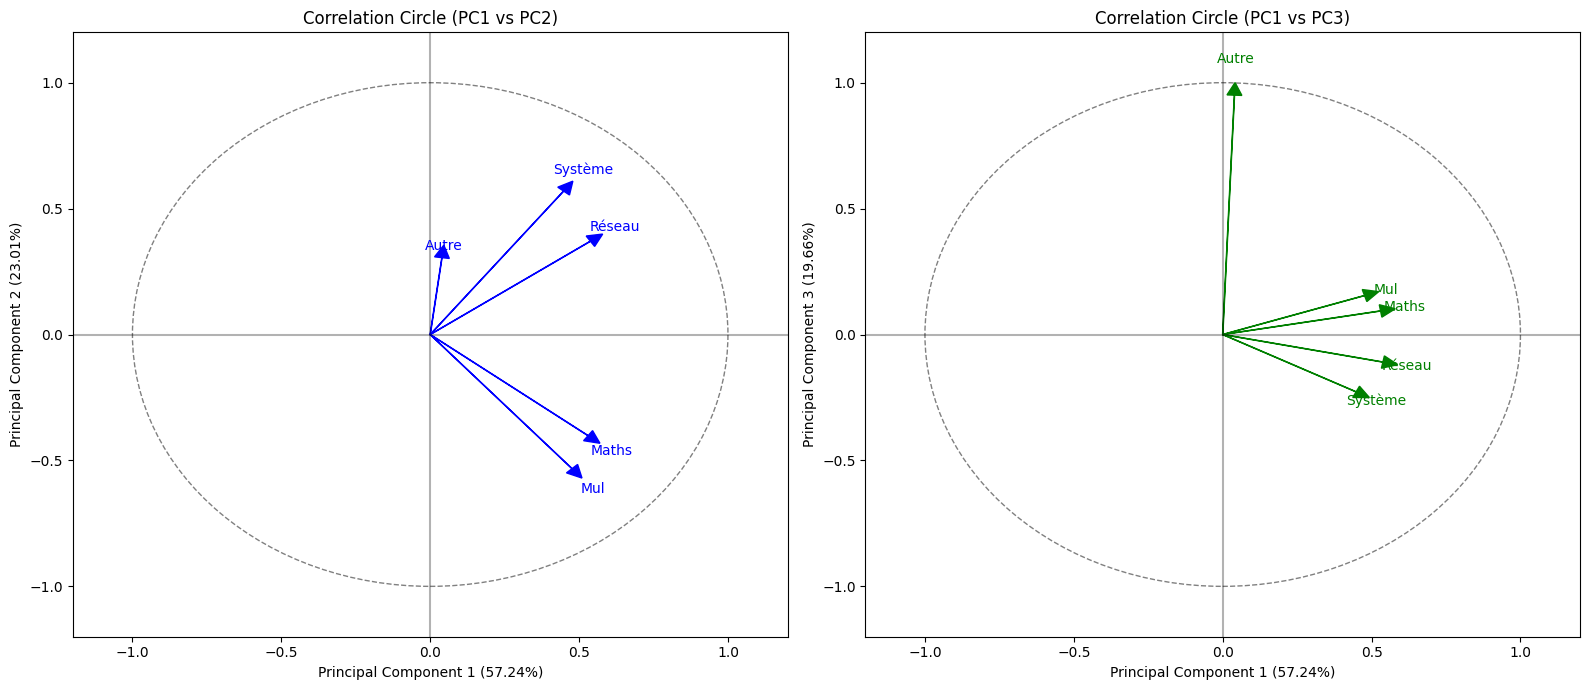

In [10]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_ * 100

# FIRST CORRELATION CIRCLE: AXIS 1 AND 2
# Draw the circle
circle1 = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
ax1.add_patch(circle1)

# Plot the variables (Axes 1 and 2)
for i, var in enumerate(variable_names):
    x = pca.components_[0, i]
    y = pca.components_[1, i]
    # Draw arrow
    ax1.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    # Add variable name
    ax1.text(x*1.15, y*1.15, var, color='blue', ha='center', va='center')

# Draw axes
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Set limits
ax1.set_xlim(-1.2, 1.2)
ax1.set_ylim(-1.2, 1.2)

# Set labels
ax1.set_xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
ax1.set_ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
ax1.set_title('Correlation Circle (PC1 vs PC2)')

# SECOND CORRELATION CIRCLE: AXIS 1 AND 3
# Draw the circle
circle2 = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
ax2.add_patch(circle2)

# Plot the variables (Axes 1 and 3)
for i, var in enumerate(variable_names):
    x = pca.components_[0, i]
    z = pca.components_[2, i]
    # Draw arrow
    ax2.arrow(0, 0, x, z, head_width=0.05, head_length=0.05, fc='green', ec='green')
    # Add variable name
    ax2.text(x*1.15, z*1.15, var, color='green', ha='center', va='center')

# Draw axes
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Set limits
ax2.set_xlim(-1.2, 1.2)
ax2.set_ylim(-1.2, 1.2)

# Set labels
ax2.set_xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
ax2.set_ylabel(f'Principal Component 3 ({explained_variance[2]:.2f}%)')
ax2.set_title('Correlation Circle (PC1 vs PC3)')

plt.tight_layout()
plt.show()

### 3) Interpret the obtained graphs. Analyze the cloud of variables.

 **PC1 vs PC2:**

*   Mul & Maths (lower right) and Système & Réseau (upper right) are strongly correlated within their respective groups.
*  Autre (upper left) is isolated, indicating a different variation pattern.
*  Opposing directions (e.g., Mul/Maths vs. Système/Réseau) suggest negative correlations.
Variables near the circle are well-represented in this plane.



 ***PC1 vs PC3:***

*  Autre is strongly linked to PC3.
*  **Mul**, Maths, Système, and Réseau cluster on the right, showing positive correlation along PC1.
*  Slight vertical separation between Mul/Maths and Système/Réseau indicates nuanced PC3 influence.


### 4) Characterize the first axis and the second axis

**PC1 (57.24% variance):**
Represents overall performance, with all variables positively correlated. High PC1 scores indicate strong performance across subjects.

---

**PC2 (23.01% variance):**
Captures the math vs. system orientation contrast, where Mul/Maths have negative coordinates and Système/Réseau/Autre have positive ones.



### 5) Determine the quality of representation of each variable in the factorial plane

In [11]:
# Calculate the quality of representation (cos²) for each variable on each axis
# This is the squared correlation between the variable and the principal component
cos2_variables = np.zeros((X.shape[1], 3))
for i in range(3):
    for j in range(X.shape[1]):
        cos2_variables[j, i] = pca.components_[i, j]**2

# Create a DataFrame to display the quality of representation
cos2_df = pd.DataFrame(cos2_variables,
                      index=variable_names,
                      columns=["Axis 1", "Axis 2", "Axis 3"])

# Calculate cumulative quality of representation for the first 2 and 3 axes
cos2_df["Axis 1+2"] = cos2_df["Axis 1"] + cos2_df["Axis 2"]
cos2_df["Axis 1+2+3"] = cos2_df["Axis 1+2"] + cos2_df["Axis 3"]

# Display the results
print("Quality of Representation (cos²) of each variable on each axis:")
print(cos2_df.round(3))

# Create a categorical assessment of representation quality
def assess_quality(value):
    if value < 0.3:
        return "Poor"
    elif value < 0.5:
        return "Moderate"
    elif value < 0.7:
        return "Good"
    else:
        return "Excellent"

assessment_df = cos2_df.copy()
for col in assessment_df.columns:
    assessment_df[col] = assessment_df[col].apply(assess_quality)

print("\nQuality Assessment:")
print(assessment_df)

Quality of Representation (cos²) of each variable on each axis:
         Axis 1  Axis 2  Axis 3  Axis 1+2  Axis 1+2+3
Mul       0.227   0.284   0.024     0.511       0.535
Maths     0.281   0.161   0.009     0.442       0.451
Système   0.201   0.324   0.052     0.525       0.577
Réseau    0.290   0.137   0.012     0.427       0.439
Autre     0.002   0.093   0.904     0.095       0.998

Quality Assessment:
        Axis 1    Axis 2     Axis 3  Axis 1+2 Axis 1+2+3
Mul       Poor      Poor       Poor      Good       Good
Maths     Poor      Poor       Poor  Moderate   Moderate
Système   Poor  Moderate       Poor      Good       Good
Réseau    Poor      Poor       Poor  Moderate   Moderate
Autre     Poor      Poor  Excellent      Poor  Excellent


## 6) Calculate the contribution of each variable to the inertia of each principal axis


In [12]:

# Calculate the contribution of each variable to the inertia of each axis
# The contribution is the squared loading divided by the sum of squared loadings for that component
contributions = np.zeros((X.shape[1], 3))
for i in range(3):
    contributions[:, i] = pca.components_[i, :]**2 / np.sum(pca.components_[i, :]**2)

# Convert to percentage
contributions *= 100

# Create a DataFrame to display the contributions
contrib_df = pd.DataFrame(contributions,
                         index=variable_names,
                         columns=["Axis 1 (%)", "Axis 2 (%)", "Axis 3 (%)"])

# Display the results
print("Contribution of each variable to the inertia of each principal axis (%):")
print(contrib_df.round(2))

# Calculate mean contribution threshold
mean_contrib = 100 / X.shape[1]
print(f"\nMean contribution threshold: {mean_contrib:.2f}%")

# Identify variables with high contributions (above threshold)
def highlight_contributions(contrib_value):
    if contrib_value > mean_contrib:
        return "Significant"
    else:
        return "Not significant"

significant_df = contrib_df.copy()
for col in significant_df.columns:
    significant_df[col] = significant_df[col].apply(highlight_contributions)

print("\nSignificance of contributions:")
print(significant_df)

Contribution of each variable to the inertia of each principal axis (%):
         Axis 1 (%)  Axis 2 (%)  Axis 3 (%)
Mul           22.69       28.37        2.39
Maths         28.12       16.13        0.88
Système       20.08       32.45        5.18
Réseau        28.95       13.73        1.20
Autre          0.16        9.32       90.35

Mean contribution threshold: 20.00%

Significance of contributions:
              Axis 1 (%)       Axis 2 (%)       Axis 3 (%)
Mul          Significant      Significant  Not significant
Maths        Significant  Not significant  Not significant
Système      Significant      Significant  Not significant
Réseau       Significant  Not significant  Not significant
Autre    Not significant  Not significant      Significant


### .7) Represent both individuals and variables graphs in the same window but in different sub-windows


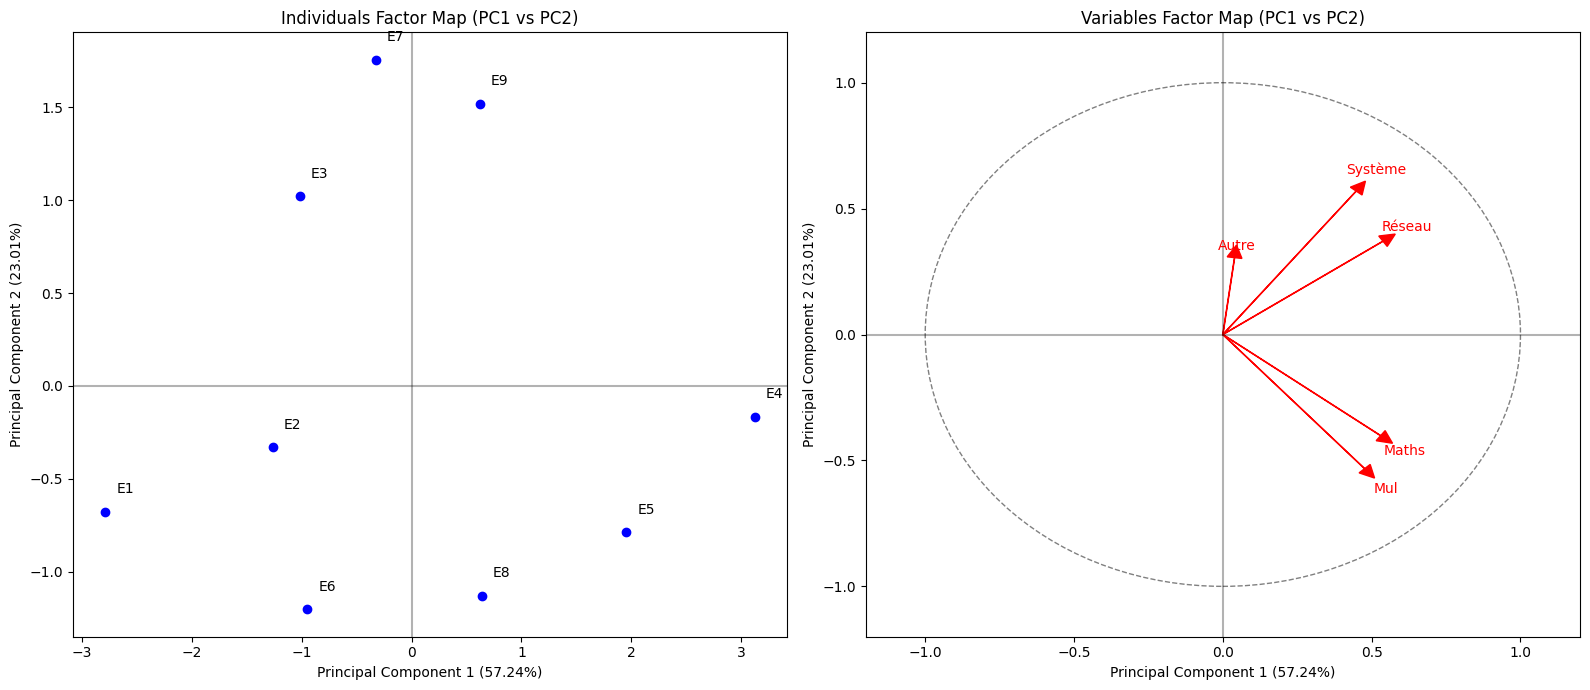

In [13]:
individual_names = [f"E{i+1}" for i in range(X.shape[0])]

# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_ * 100

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# PLOT 1: INDIVIDUALS (OBSERVATIONS)
for i, ind in enumerate(individual_names):
    ax1.scatter(X_pca[i, 0], X_pca[i, 1], color='blue')
    ax1.text(X_pca[i, 0] + 0.1, X_pca[i, 1] + 0.1, ind, fontsize=10)

# Draw axes
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Set labels
ax1.set_xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
ax1.set_ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
ax1.set_title('Individuals Factor Map (PC1 vs PC2)')

# PLOT 2: VARIABLES (CORRELATION CIRCLE)
# Draw the circle
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
ax2.add_patch(circle)

# Plot the variables
for i, var in enumerate(variable_names):
    x = pca.components_[0, i]
    y = pca.components_[1, i]
    # Draw arrow
    ax2.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='red', ec='red')
    # Add variable name
    ax2.text(x*1.15, y*1.15, var, color='red', ha='center', va='center')

# Draw axes
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Set limits
ax2.set_xlim(-1.2, 1.2)
ax2.set_ylim(-1.2, 1.2)

# Set labels
ax2.set_xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)')
ax2.set_ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)')
ax2.set_title('Variables Factor Map (PC1 vs PC2)')

plt.tight_layout()
plt.show()

### 8) Create a biplot (CA factor map) displaying both individuals and variables

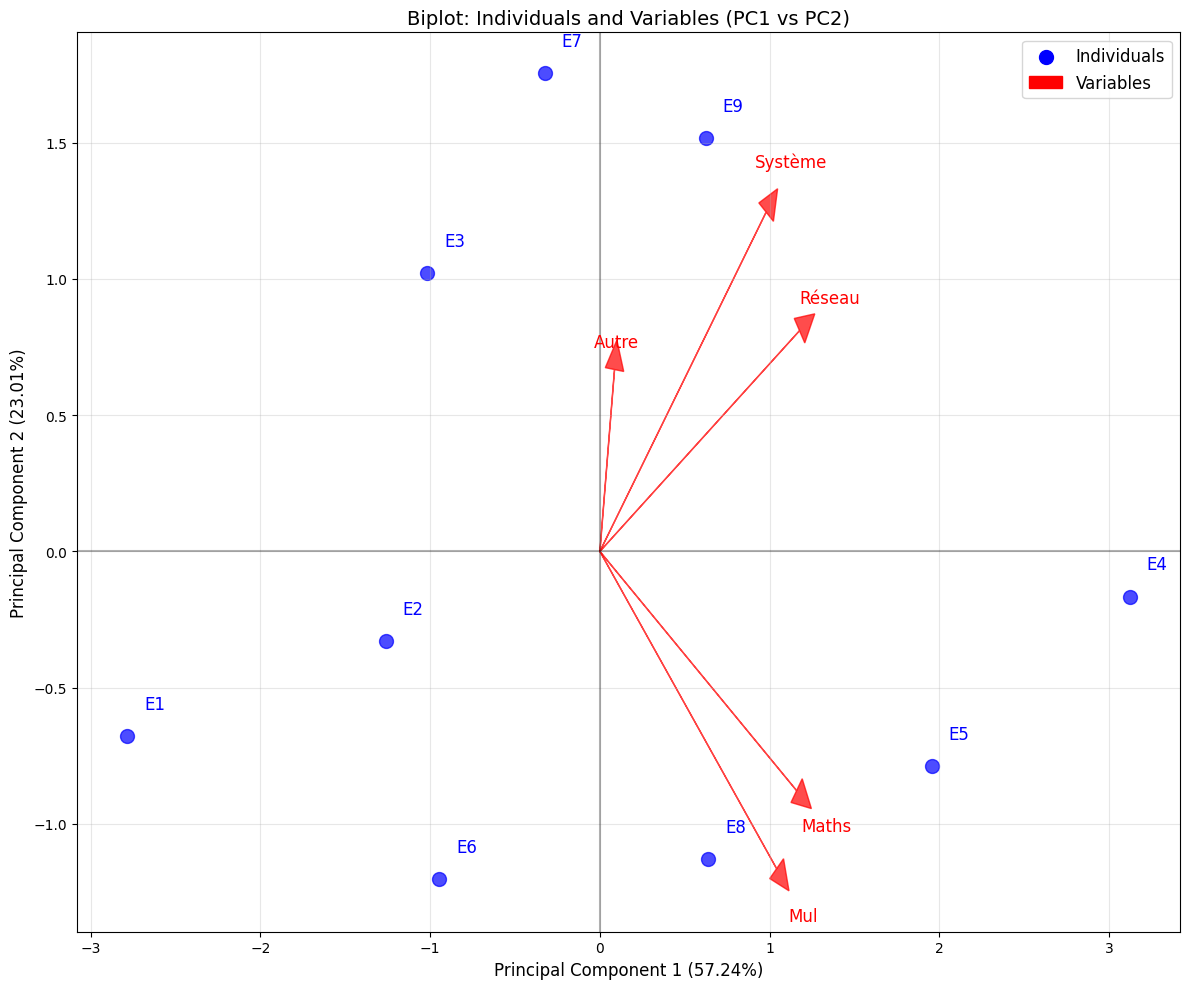

In [14]:
# Create a figure for the biplot
plt.figure(figsize=(12, 10))

# Plot individuals (observations)
for i, ind in enumerate(individual_names):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], color='blue', s=100, alpha=0.7)
    plt.text(X_pca[i, 0] + 0.1, X_pca[i, 1] + 0.1, ind, fontsize=12, color='blue')

# Calculate scaling factor to plot both individuals and variables on same scale
# This helps with visualization - the scaling can be adjusted based on preference
scale_factor = np.abs(X_pca).max() * 0.7

# Plot variables as vectors
for i, var in enumerate(variable_names):
    x = pca.components_[0, i] * scale_factor
    y = pca.components_[1, i] * scale_factor
    # Draw arrow
    plt.arrow(0, 0, x, y, head_width=scale_factor*0.05, head_length=scale_factor*0.05,
              fc='red', ec='red', alpha=0.7)
    # Add variable name
    plt.text(x*1.15, y*1.15, var, color='red', ha='center', va='center', fontsize=12)

# Draw axes
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Add legend
plt.scatter([], [], color='blue', s=100, label='Individuals')
plt.arrow(0, 0, 0, 0, fc='red', ec='red', label='Variables')
plt.legend(fontsize=12)

# Set labels
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)', fontsize=12)
plt.title('Biplot: Individuals and Variables (PC1 vs PC2)', fontsize=14)

# Add grid
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()